In [61]:
import numpy as np
import matplotlib.pyplot as plt
import torch
from sentence_transformers import SentenceTransformer, util
from scipy.spatial import cKDTree
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import normalize
import pickle
import re
from utils.normalizor import normalizor
import tqdm
import math

In [62]:
model = SentenceTransformer('all-roberta-large-v1')
# model = SentenceTransformer('paraphrase-multilingual-MiniLM-L12-v2')
# model.load_state_dict(torch.load('model1.pt'))

In [63]:
correct = 0
dif = 0
mp = {}
ma = 0

plotx = []
ploty = []

In [64]:
tree : cKDTree
Comments = []

with open("data/data.pkl", "rb") as f:
    raw = pickle.load(f)
    tree = pickle.loads(raw)

with open("data/comments.pkl", "rb") as f:
    Comments = pickle.load(f)

In [65]:
import string
for num, (position, comment) in enumerate(Comments):
    position = position[39:]
    # alphabet = string.ascii_letters + string.digits + "/\\"
    # for i in range(len(comment)):
    #     if comment[i] not in alphabet:
    #         comment = comment[:i] + " " + comment[i + 1:]
    # comment = re.sub(r"[^a-zA-Z/0-9]", " ", comment)
    # comment = re.sub(u"([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a])"," ",comment)
    # position = re.sub(u"([^\u4e00-\u9fa5\u0030-\u0039\u0041-\u005a\u0061-\u007a])","",position)
    # q = tree.query(normalizor(model.encode(position, convert_to_tensor = False)), 5)[1]
    q = tree.query(normalizor(model.encode(comment, convert_to_tensor=False)), 2)[1]
    miny = 100000
    for y in q:
        miny = min(miny, abs(y - num))
        if abs(y - num) < len(Comments) / 100:
            correct += 1
            break
    plotx.append(num)
    ploty.append(miny)
    if num % 100 == 1:
        print("[{}/{}]({:.2f}%) correct:{}(rate:{:.2f}%)".format(num, len(Comments), num/len(Comments)*100, correct, correct / (num + 1) * 100))

print('{:.2f}%'.format(correct / len(Comments) * 100))

[1/16371](0.01%) correct:1(rate:50.00%)
[101/16371](0.62%) correct:46(rate:45.10%)
[201/16371](1.23%) correct:126(rate:62.38%)
[301/16371](1.84%) correct:185(rate:61.26%)
[401/16371](2.45%) correct:256(rate:63.68%)
[501/16371](3.06%) correct:316(rate:62.95%)
[601/16371](3.67%) correct:389(rate:64.62%)
[701/16371](4.28%) correct:438(rate:62.39%)
[801/16371](4.89%) correct:518(rate:64.59%)
[901/16371](5.50%) correct:605(rate:67.07%)
[1001/16371](6.11%) correct:670(rate:66.87%)
[1101/16371](6.73%) correct:743(rate:67.42%)
[1201/16371](7.34%) correct:811(rate:67.47%)
[1301/16371](7.95%) correct:880(rate:67.59%)
[1401/16371](8.56%) correct:950(rate:67.76%)
[1501/16371](9.17%) correct:1004(rate:66.84%)
[1601/16371](9.78%) correct:1084(rate:67.67%)
[1701/16371](10.39%) correct:1143(rate:67.16%)
[1801/16371](11.00%) correct:1186(rate:65.82%)
[1901/16371](11.61%) correct:1232(rate:64.77%)
[2001/16371](12.22%) correct:1282(rate:64.04%)
[2101/16371](12.83%) correct:1332(rate:63.37%)
[2201/16371](

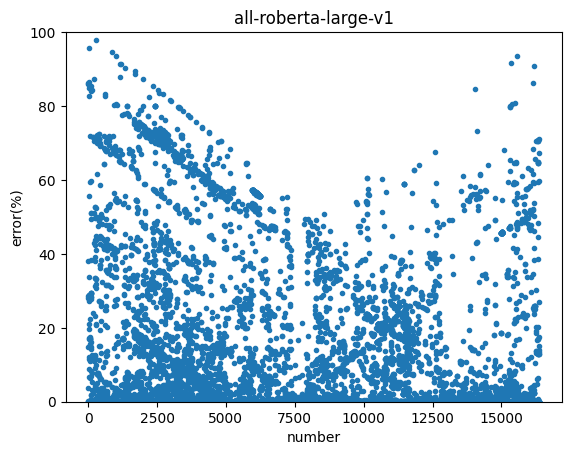

In [66]:
y = [y / len(Comments) * 100 for y in ploty]
plt.plot(plotx, y, '.')
plt.ylim(0, 100)
plt.xlabel("number")
plt.ylabel("error(%)")
plt.title("all-roberta-large-v1")
plt.show()